# Task 1

Use the notebook  Last ned notebook provided to implement PCA (without using the builtin function for PCA)

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Text(0.5, 0.5, 'Z Label')

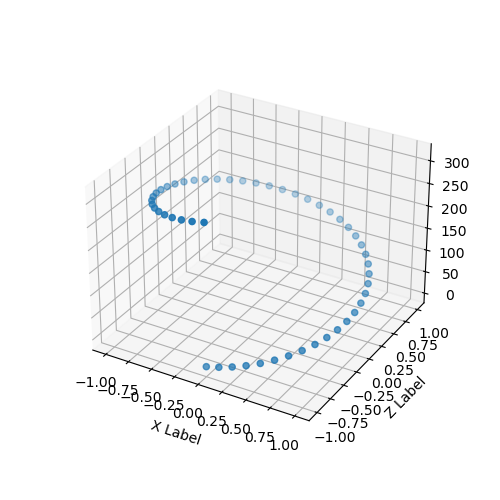

In [3]:
rng = np.random.RandomState(1)
theta = np.linspace(0, 100*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X = np.array(list(zip(x,y,z)))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_ylabel('Z Label')

Standardize the data 

Text(0.5, 0, 'Z Label')

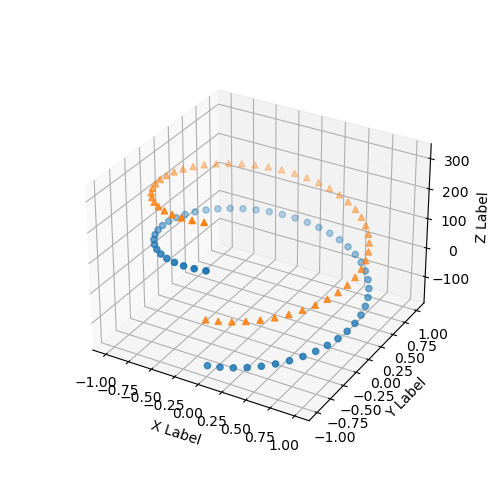

In [4]:
X_scaled = X - X.mean(axis=0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [5]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')

Shape of X_scaled: (50, 3)
Shape of features: (3, 50)


In [6]:
cov_matrix =  np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
#Insert Code#

Shape of cov_matrix: (3, 3)


Find the Eigen decomposition. Use library functions

In [7]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

Sort the eigen values and the eigen vectors an print them 

In [8]:
sorted_eig_values = np.sort(eig_values)[::-1]

sorted_eig_vectors =  eig_vectors[:, eig_values.argsort()[::-1]]

print(f'Eigenvalues: {sorted_eig_values}')
print(f'Eigenvectors: {sorted_eig_vectors}')


Eigenvalues: [8.73535804e+03 5.20000000e-01 2.14574436e-01]
Eigenvectors: [[ 0.00571625  0.         -0.99998366]
 [ 0.          1.         -0.        ]
 [-0.99998366  0.         -0.00571625]]


Calculate the cumulative variance expressed by each eigen value

Eigenvalues upto 1 expresses 0.9999159149898562 % variance
Eigenvalues upto 2 expresses 5.952317847631664e-05 % variance
Eigenvalues upto 3 expresses 2.4561831667455563e-05 % variance


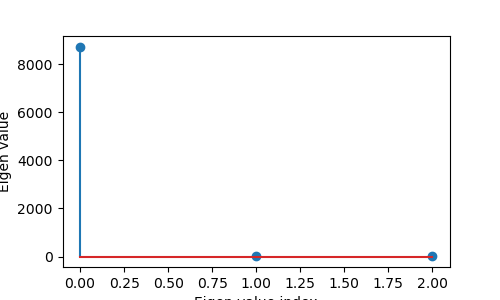

In [9]:
for i in range(3):
    exp_var = sorted_eig_values[i] / np.sum(sorted_eig_values)
    print(f'Eigenvalues upto {i+1} expresses {exp_var} % variance')
    
plt.figure(figsize=(5,3))
plt.stem(sorted_eig_values, use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

Choose a subset of vectors to use

In [10]:
reduced_eigen_space = sorted_eig_vectors[:, :2]
print(reduced_eigen_space)
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')

[[ 0.00571625  0.        ]
 [ 0.          1.        ]
 [-0.99998366  0.        ]]
Shape of X_scaled: (50, 3)
Shape of reduced_eigen_space: (3, 2)


Transform the scaled data using the reduced eigen space

In [11]:
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_compressed: (50, 2)


To verify that we can indeed go back and forth among representations, get the reconstructed data using the transpose of the previous transformation

In [13]:
X_reconstructed = np.dot(X_compressed, reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_reconstructed: (50, 3)


Reconstruct the data (i.e. reverse the standardization that you had used) to visualize it

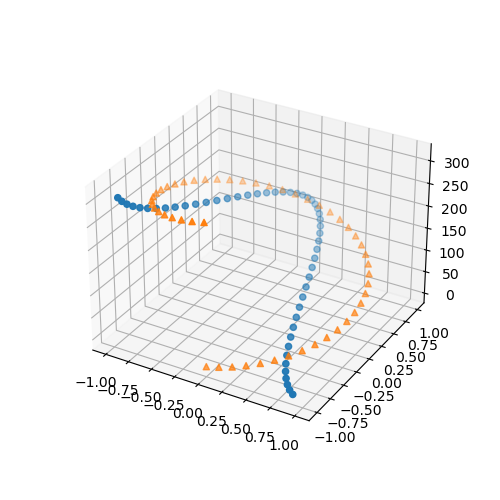

In [14]:
data_reconstructed = X_reconstructed + X.mean(axis=0)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_reconstructed[:,0], data_reconstructed[:,1], data_reconstructed[:,2], marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='^')